## Near State-of-the-Art results at Object Recognition

In this project, we will be deploying a convolutional neural network (CNN) for object recognition. More specifically, we will be using the All-CNN network published in the 2015 ICLR paper, "Striving For Simplicity: The All Convolutional Net".  This paper can be found at the following link:

https://arxiv.org/pdf/1412.6806.pdf

Dataset:-  CIFAR-10

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


### 1. Load Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 759s 4us/step


In [3]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [12]:
X_train[0].shape


(32, 32, 3)

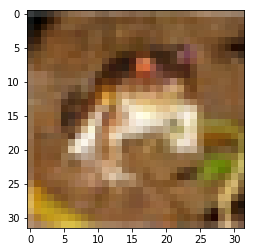

In [6]:
plt.imshow(X_train[0])
plt.show()

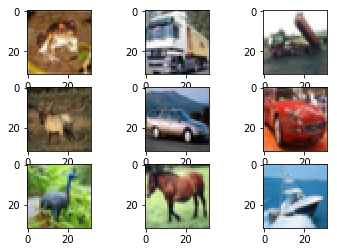

In [15]:
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)

plt.show()

### 2. Preprocessing the dataset

In [16]:
np.random.seed(101) 

#normalizing input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [17]:
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


##### Converting the lables to hot encoding 

In [18]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


### 3. Building ALL-CNN model-C

In [19]:
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from keras.optimizers import SGD

<img src="Capture.PNG">

In [23]:
def allcnn(weights=None):
   
    model = Sequential()


    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

 
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
 
    if weights:
        model.load_weights(weights)

    return model

### Defining Parameters and Training Model

In [24]:
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9


model = allcnn()

sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


print (model.summary())

epochs = 350
batch_size = 32


model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 96)        83040     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 192)       166080    
__________

KeyboardInterrupt: 